Задачей даннной работы является выявления преимуществ и недостатков следующих методов оптимизации нулевого и первого порядка:
Замечание:Описание метода предсатвляет сообой переход метода от состояния a к состоинию b ввиду итеративности всех представленных методов 
1) Градиентный спуск с фиксированным шагом. Описание метода: По исходной точке a и значению градиента функции в ней вычисляется точка b как a - grad(f) * learning_rate, где learning_rate - предварительно заданное значение, неизменное на протяжении всей 
2) Градиентный спуск с изменяющимся шагом на основе метода дихотомии. Описание метода:  По исходной точке a и значению градиента функции в ней вычисляется точка b как a - grad(f) * learning_rate1, где learning_rate - результат работы метода дихотомии на функции f(learning_rate1) = a - grad(f) * learning_rate1. Левой границей метода служит 0, правой -learning_rate, задаваемый для градиентного спуска. Вычисление останавливается при достижении заданной точности 
3) Градиентный спуск с изменяющимся шагом на основе метода золотого сечения. Описание метода: аналогичен п.2, за исключением того, что вместо метода дихотомии используется метод золотого сечения
Замечание: для большей стабильности методов 1-3 градиент (в формуле вычисления следующего значения) нормируется
4) Метод покоординатного спуска. Описание метода: Основываясь на исходной точке x и длине шага step_len Итеративно проверяется точка, получаемая из x прибавлением step_len к проверяемой координате. Если значение меньше, чем в x - происходит переход в данную точку, иначе проверяется значение в точке, получаемой из x вычитанием step_len из проверяемой координаты. Если значение в ней меньше, чем в x - происходит переход, иначе аналогичные проверки проводятся по следующей координате. Если перехода не произошло после проверки всех координат, значение step_len уменьшается
5) Метод Нелдера-Мида. Описание метода:

[609.0]
Point(coordinates=array([9.99999078e+00, 4.99998003e+00, 4.83961441e-10]))


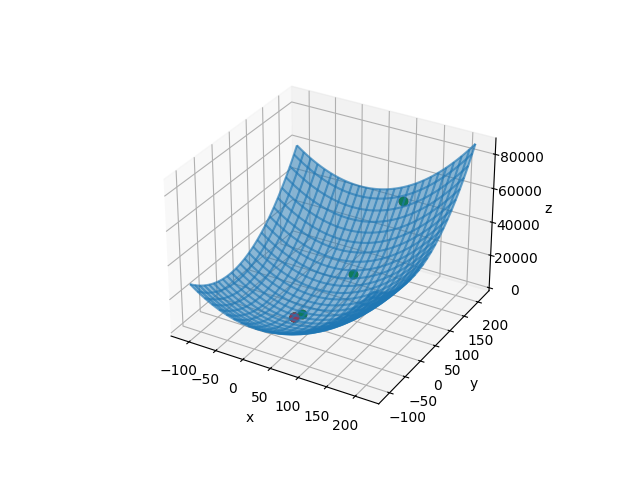

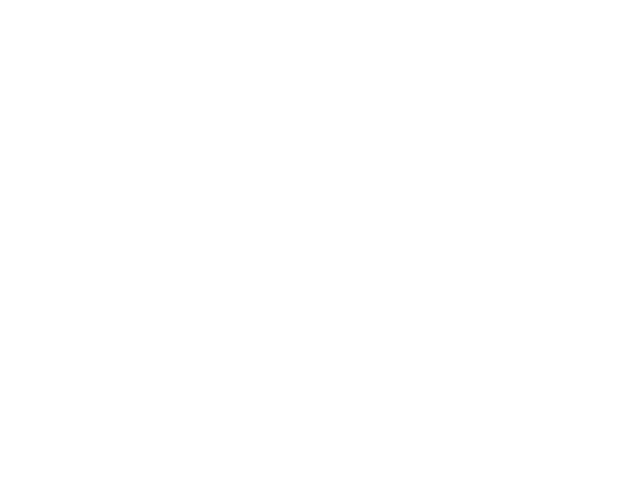

In [1]:
%matplotlib widget
from src.metric import CallCount, GradientCount, StepCountBeforePrecision, TrueGradientCount
from src.common.oracul import LambdaOracul, PoweredSumOracul, GradientLambdaOracul

from src.lab1.stop_condition import CountCondition, PrecisionCondition, PrecisionOrCountCondition
import numpy as np
from src.common import Oracul, Point
from src.lab1.method_processor import MethodProcessor
from src.lab1.methods import RandomMethod, GoldenRatioMethod, GradientDescent, BaseGradientDescent, DichotomyMethod, \
    CoordinateDescent

import matplotlib.pyplot as plt

fig = plt.figure()

method = RandomMethod()
golden_ratio = GoldenRatioMethod()
gradient_descent_fix = BaseGradientDescent()
gradient_descent_golden = GradientDescent()
gradient_descent_dichotomy = GradientDescent(method=DichotomyMethod())
coordinate_descent = CoordinateDescent()
oracul = LambdaOracul(lambda x: (x - 10) ** 2)
test_oracul = PoweredSumOracul([[2, 2], [0, 2]])
gradient_oracul = GradientLambdaOracul(lambda x, y: (x - 10) ** 2 + (y - 5) ** 2,
                                       lambda x, y: np.array([2 * (x - 10), 2 * (y - 5)], dtype=np.float64))
point, metrics, anim = MethodProcessor.process(gradient_descent_golden, gradient_oracul, CountCondition(20),
                                               metrics=[CallCount()],
                                               method_params={"x": np.array([100, 200]), 'learning_rate': 100},
                                               visualize=True,
                                               low_bracket=[-100, -100], high_bracket=[200, 200])
print(metrics)
print(point)
plt.show()

In [2]:
base_test = GradientLambdaOracul(lambda x, y: x ** 2 + y ** 2,
                                 lambda x, y: np.array([2 * x, 2 * y], dtype=np.float64))
base_differential = GradientLambdaOracul(lambda x, y: 0.26 * (x ** 2 + y ** 2) - 0.48 * x * y,
                                         lambda x, y: np.array([0.52 * x - 0.48 * y, 0.52 * y - 0.48 * x],
                                                               dtype=np.float64))
bad_defined_base = GradientLambdaOracul(lambda x, y: 100 * x ** 2 + y ** 2,
                                        lambda x, y: np.array([200 * x, 2 * y], dtype=np.float64))
isom_function = GradientLambdaOracul(
    lambda x, y: -np.cos(x) * np.cos(y) * np.exp(-((x - np.pi) ** 2 + (y - np.pi) ** 2)),
    lambda x, y: np.array(
        [np.exp(-(x - np.pi) ** 2 - (y - np.pi) ** 2) * np.cos(x) * np.cos(y) + 2 * (x - np.pi) * np.cos(x),
         np.exp(-(x - np.pi) ** 2 - (y - np.pi) ** 2) * np.cos(x) * np.cos(y) + 2 * (y - np.pi) * np.cos(y)],
        dtype=np.float64))

In [8]:
def tester(methods, oraculs, eps=0.001, start_point=np.array([100, 200]), visualize=True, braket_l = None, braket_h = None):
    res_points = []
    res_metrics = []
    part_anim_res = []
    for m in methods:
        part_point_res = []
        part_metric_res = []
        for f in oraculs:
            temp_point, temp_metrics, temp_anim = MethodProcessor.process(m, f, PrecisionCondition(eps),
                                                                          metrics=[CallCount(), GradientCount(),
                                                                                   StepCountBeforePrecision(eps)],
                                                                          method_params={"x": start_point,
                                                                                         "learning_rate": 300,
                                                                                         "eps": eps},
                                                                          visualize=visualize,
                                                                          low_bracket=braket_l,
                                                                          high_bracket=braket_h)
            part_anim_res += [temp_anim]
            part_point_res += [temp_point]
            part_metric_res += [temp_metrics]
        res_points += [part_point_res]
        res_metrics += [part_metric_res]
    return res_points, res_metrics, part_anim_res


def test_fix_grad(oraculs, params, eps=0.001, start_point=np.array([100, 200]), visualize=False, braket_l = None, braket_h = None):
    res_points = []
    res_metrics = []
    anim_res = []
    for f in range(len(oraculs)):
        temp_point, temp_metrics, temp_anim = MethodProcessor.process(BaseGradientDescent(), oraculs[f],
                                                                      PrecisionOrCountCondition(eps, 10 ** 5),
                                                                      metrics=[CallCount(), GradientCount(),
                                                                               StepCountBeforePrecision(eps),
                                                                               TrueGradientCount(
                                                                                   np.array([0, 0], dtype=np.float64),
                                                                                   eps)],
                                                                      method_params={"x": start_point,
                                                                                     "learning_rate": params[f],
                                                                                     "eps": eps},
                                                                      visualize=visualize,
                                                                      low_bracket=braket_l,
                                                                      high_bracket=braket_h)
        print(temp_point)
        res_points += [temp_point]
        res_metrics += [temp_metrics]
        anim_res += [temp_anim]
    return res_points, res_metrics, anim_res


In [9]:
tester([gradient_descent_golden, gradient_descent_dichotomy, coordinate_descent],
       [base_test, base_differential, bad_defined_base], visualize=False)  #turn on visualization  to demonstration

([[Point(coordinates=array([2.05303102e-05, 4.10606204e-05, 2.10746819e-09])),
   Point(coordinates=array([1.72598392e-03, 1.69694488e-03, 1.17375232e-07])),
   Point(coordinates=array([9.60793507e-05, 4.72072307e-03, 2.32083504e-05]))],
  [Point(coordinates=array([-1.21306236e-05, -2.42612472e-05,  7.35760144e-10])),
   Point(coordinates=array([2.69353543e-03, 2.69012430e-03, 2.89840829e-07])),
   Point(coordinates=array([2.32868414e-05, 4.35845279e-03, 1.90503384e-05]))],
  [Point(coordinates=array([ 3.81469727e-04, -3.81469727e-04,  2.91038305e-07])),
   Point(coordinates=array([1.52587891e-03, 1.90734863e-03, 1.54250301e-07])),
   Point(coordinates=array([ 3.81469727e-04, -3.81469727e-04,  1.46974344e-05]))]],
 [[[69.0, 2.0, 2.0], [579.0, 17.0, 17.0], [273.0, 8.0, 8.0]],
  [[91.0, 2.0, 2.0], [766.0, 17.0, 17.0], [406.0, 9.0, 9.0]],
  [[135.0, 0.0, 38.0], [182.0, 0.0, 53.0], [133.0, 0.0, 38.0]]],
 [None, None, None, None, None, None, None, None, None])

In [5]:
test_fix_grad([base_test, base_differential, bad_defined_base], [0.02, 0.02001, 0.0201], visualize=False)

Point(coordinates=array([-0.00590423, -0.01180845,  0.0001743 ]))
Point(coordinates=array([-1.32752810e-02, -1.32752810e-02,  7.04932343e-06]))
Point(coordinates=array([1.35633336e-002, 7.90505033e-323, 1.83964018e-002]))


([Point(coordinates=array([-0.00590423, -0.01180845,  0.0001743 ])),
  Point(coordinates=array([-1.32752810e-02, -1.32752810e-02,  7.04932343e-06])),
  Point(coordinates=array([1.35633336e-002, 7.90505033e-323, 1.83964018e-002]))],
 [[100000.0, 99999.0, 100000.0, 100000.0],
  [100000.0, 99999.0, 100000.0, 100000.0],
  [100000.0, 99999.0, 100000.0, 100000.0]],
 [None, None, None])

Замечание: Здесь и далее под методами градиентного спуска понимаются методы на основе градиентного спуска с нефиксированным шагом
Первый тест позволяет обнаружить следубщие особенности методов:
1) Как наиболее явное отличие, методы покоординатного спуска и Нелдера-Мида не требуют вычисления градиента, что является весьма значительной особенностью и выгодно выделяет их на фоне методов градиетного спуска
2) Метод градиетного спуска с фиксированным шагом, хотя и требует вычисления значений функции при данной постановке задачи, не столь сильно в ней нуждается, используя лишь для проверки приближения (как можно заметить, число шагов метода равно числу вычислений значений). Однако едва ли данное преимущество способно перекрыть такие недостатки метода, как отсутствие гарнтии сходимости и потребность в тонкой настройке параметров для обеспечения приемлимой точности или минимальной работоспособности, кроме того число вычислений градиента отличается на порядки ввиду необходимости выставления достаточно малого шага для получения приемлимой точности, кроме того возможны попадания в циклы
3) Хотя методы градиентного спуска и требуют несколько большего числа вычислений значений функции (в основном из-за необходимости вычисления шага с достаточной точностью), число их итераций для достижения искомой точности меньше, чем требуемое для покоординатного спуска *предположительно и Нелдера-Мида*
4) Метод градиентного спуска на основе дихотомии требует значительно большего числа вычисления значений функций, что является ожидаемым следствием меньшей вычислительной эффективности внутреннего метода

In [5]:
tester([GradientDescent(method=GoldenRatioMethod(), aprox_dec=0.001),
        GradientDescent(method=DichotomyMethod(), aprox_dec=0.001), coordinate_descent],
       [base_test, base_differential, bad_defined_base], eps=0.01, visualize=False)

([[Point(coordinates=array([-1.40716840e-04, -2.81433679e-04,  9.90061449e-08])),
   Point(coordinates=array([6.04792814e-04, 6.35190344e-04, 1.56065848e-08])),
   Point(coordinates=array([1.03480790e-05, 4.39963062e-02, 1.93568566e-03]))],
  [Point(coordinates=array([5.18437944e-05, 1.03687589e-04, 1.34388951e-08])),
   Point(coordinates=array([2.09862111e-02, 2.04160398e-02, 1.72227376e-05])),
   Point(coordinates=array([0.00012374, 0.03056713, 0.00093588]))],
  [Point(coordinates=array([ 6.10351562e-03, -6.10351562e-03,  7.45058060e-05])),
   Point(coordinates=array([2.44140625e-02, 3.05175781e-02, 3.94880772e-05])),
   Point(coordinates=array([ 0.00610352, -0.00610352,  0.00376254]))]],
 [[[61.0, 2.0, 2.0], [451.0, 15.0, 15.0], [211.0, 7.0, 7.0]],
  [[79.0, 2.0, 2.0], [586.0, 15.0, 15.0], [274.0, 7.0, 7.0]],
  [[107.0, 0.0, 30.0], [142.0, 0.0, 41.0], [105.0, 0.0, 30.0]]],
 [None, None, None, None, None, None, None, None, None])

In [7]:
test_fix_grad([base_test, base_differential, bad_defined_base], [0.05, 0.05001, 0.0501], eps=0.01, visualize=False)

Point(coordinates=array([-0.01932063, -0.03864127,  0.00186643]))
Point(coordinates=array([2.70683139e-02, 2.70683139e-02, 2.93077447e-05]))
Point(coordinates=array([-4.60720952e-002, -1.48219694e-323,  2.12263796e-001]))


([Point(coordinates=array([-0.01932063, -0.03864127,  0.00186643])),
  Point(coordinates=array([2.70683139e-02, 2.70683139e-02, 2.93077447e-05])),
  Point(coordinates=array([-4.60720952e-002, -1.48219694e-323,  2.12263796e-001]))],
 [[100000.0, 99999.0, 100000.0, 4472.0],
  [100000.0, 99999.0, 100000.0, 100000.0],
  [100000.0, 99999.0, 100000.0, 5822.0]],
 [None, None, None])

In [6]:
tester([GradientDescent(method=GoldenRatioMethod(), aprox_dec=0.01),
        GradientDescent(method=DichotomyMethod(), aprox_dec=0.01), coordinate_descent],
       [base_test, base_differential, bad_defined_base], eps=0.1, visualize=False)

([[Point(coordinates=array([-1.12924171e-03, -2.25848343e-03,  6.37593424e-06])),
   Point(coordinates=array([3.80458961e-02, 3.63705445e-02, 5.60797670e-05])),
   Point(coordinates=array([0.00071786, 0.03216755, 0.00108628]))],
  [Point(coordinates=array([-7.15849222e-04, -1.43169844e-03,  2.56220054e-06])),
   Point(coordinates=array([0.08307133, 0.0880796 , 0.0002992 ])),
   Point(coordinates=array([6.11020851e-04, 3.89126596e-03, 5.24765988e-05]))],
  [Point(coordinates=array([-0.04882812,  0.04882812,  0.00476837])),
   Point(coordinates=array([0.24414062, 0.1953125 , 0.00252724])),
   Point(coordinates=array([-0.04882812,  0.04882812,  0.24080276]))]],
 [[[51.0, 2.0, 2.0], [276.0, 11.0, 11.0], [126.0, 5.0, 5.0]],
  [[63.0, 2.0, 2.0], [342.0, 11.0, 11.0], [218.0, 7.0, 7.0]],
  [[86.0, 0.0, 24.0], [112.0, 0.0, 32.0], [86.0, 0.0, 24.0]]],
 [None, None, None, None, None, None, None, None, None])

In [9]:
test_fix_grad([base_test, base_differential, bad_defined_base], [0.101, 0.1001, 0.101], eps=0.1, visualize=False)

Point(coordinates=array([0.04194763, 0.08389526, 0.00879802]))
Point(coordinates=array([-5.19507692e-03, -5.19507692e-03,  1.07955297e-06]))
Point(coordinates=array([ 4.11803687e-002, -8.89318163e-323,  1.69582276e-001]))


([Point(coordinates=array([0.04194763, 0.08389526, 0.00879802])),
  Point(coordinates=array([-5.19507692e-03, -5.19507692e-03,  1.07955297e-06])),
  Point(coordinates=array([ 4.11803687e-002, -8.89318163e-323,  1.69582276e-001]))],
 [[100000.0, 99999.0, 100000.0, 2213.0],
  [100000.0, 99999.0, 100000.0, 2620.0],
  [100000.0, 99999.0, 100000.0, 2888.0]],
 [None, None, None])

Таким образом, при понижении точности, общие тенденции сохраняются, хотя и уменьшается разница в абсолютных значениях.
Тем не менее, стоит обратить внимание на следующие особенности:
 1) понижение точности для градиентных методов означает не только уменьшение числа вычислений функции, но и её градиента
2) Благодаря особенностям работы методов, методы градиентного спуска, как правило, вычисляют значение с некоторым запасом точности, в отличие от метода покоординатного спуска
3) Хотя запрашиваемое приближение для внутренних методов градиентых спусков (дихотомии и золотого сечения) одинаково, можно заметить, что в двух тестах число итераций градиентного спуска на основе метода золотого сечения было меньшим. Вероятно, данная особенность связана с попаданием минимума в меньший из промежутков и, как следствие, вычисление с большей реальной точностью, при меньшем объёме вычислений.
4) Использование метода градиентного спуска с фиксированным шагом на функции неизвестного вида с целью получения заданного приближения видится сомнительным
5) При уменьшении запрашиваемой точности применение метода градиентного спуска с фиксированным шагом видится более целесообразным, нежели при желании получить высокую точность, ведь хотя метод и входил в бесконечный цикл, будучи неспособным приблизиться к точке или понять ,что он уже достаточно близок, приближение происходило за разумное время

In [10]:
tester([gradient_descent_golden, gradient_descent_dichotomy, coordinate_descent],
       [base_test, base_differential, bad_defined_base], start_point=np.array([10, 20]), visualize=False)

([[Point(coordinates=array([-2.02307770e-05, -4.04615541e-05,  2.04642170e-09])),
   Point(coordinates=array([2.57991871e-05, 2.12757818e-05, 2.72758257e-11])),
   Point(coordinates=array([-3.34063831e-05,  9.77396574e-03,  9.56420049e-05]))],
  [Point(coordinates=array([-1.21306236e-06, -2.42612472e-06,  7.35760144e-12])),
   Point(coordinates=array([6.74583504e-05, 8.93960398e-05, 3.66348551e-10])),
   Point(coordinates=array([-1.93240793e-05,  5.49043676e-04,  3.38790962e-07]))],
  [Point(coordinates=array([1.52587891e-04, 3.05175781e-04, 1.16415322e-07])),
   Point(coordinates=array([1.52587891e-04, 3.05175781e-04, 7.91624188e-09])),
   Point(coordinates=array([1.52587891e-04, 3.05175781e-04, 2.42143869e-06]))]],
 [[[69.0, 2.0, 2.0], [511.0, 15.0, 15.0], [307.0, 9.0, 9.0]],
  [[91.0, 2.0, 2.0], [676.0, 15.0, 15.0], [316.0, 7.0, 7.0]],
  [[103.0, 0.0, 17.0], [93.0, 0.0, 9.0], [101.0, 0.0, 17.0]]],
 [None, None, None, None, None, None, None, None, None])

In [11]:
tester([gradient_descent_golden, gradient_descent_dichotomy, coordinate_descent],
       [base_test, base_differential, bad_defined_base], start_point=np.array([-100, -200]), visualize=False)

([[Point(coordinates=array([-2.05303102e-05, -4.10606204e-05,  2.10746819e-09])),
   Point(coordinates=array([-1.72598392e-03, -1.69694488e-03,  1.17375232e-07])),
   Point(coordinates=array([-9.60793507e-05, -4.72072307e-03,  2.32083504e-05]))],
  [Point(coordinates=array([1.21306236e-05, 2.42612472e-05, 7.35760144e-10])),
   Point(coordinates=array([-2.69353543e-03, -2.69012430e-03,  2.89840829e-07])),
   Point(coordinates=array([-2.32868414e-05, -4.35845279e-03,  1.90503384e-05]))],
  [Point(coordinates=array([-3.81469727e-04,  3.81469727e-04,  2.91038305e-07])),
   Point(coordinates=array([-1.52587891e-03, -1.90734863e-03,  1.54250301e-07])),
   Point(coordinates=array([-3.81469727e-04,  3.81469727e-04,  1.46974344e-05]))]],
 [[[69.0, 2.0, 2.0], [579.0, 17.0, 17.0], [273.0, 8.0, 8.0]],
  [[91.0, 2.0, 2.0], [766.0, 17.0, 17.0], [406.0, 9.0, 9.0]],
  [[132.0, 0.0, 38.0], [132.0, 0.0, 53.0], [132.0, 0.0, 38.0]]],
 [None, None, None, None, None, None, None, None, None])

Влияение выбора точки на работу метдов замечено не было.  

KeyboardInterrupt: 